In [1]:
from ensemble_functions import *

In [2]:
df = pd.read_parquet('../data_export/prueba_ml.parquet')
df.reset_index(inplace=True, drop=True)
df['dia_semana'] = df['fecha'].dt.weekday + 1
year = 2023
us_holidays = holidays.US(years=year)
us_holidays
df['holiday'] = np.where(df['fecha'].isin(us_holidays), 1, 0)
df['rain'] = df['rain'].shift(1)
df['snowfall'] = df['snowfall'].shift(1)
df.fillna(0.0, inplace=True)
df['datetime'] = pd.to_datetime(df['fecha'].astype(str) + ' ' + df['hora'].astype(int).astype(str) + ':00:00')
df.drop(columns='fecha', inplace=True)
df.set_index('datetime', inplace=True)

In [3]:
ensemble, ensemble_predictions, ensemble_errors = train_ensemble(data=df, verbose=1, file='ensemble_prueba_2.joblib')

Comienzo del entrenamiento del ensemble
Inicio de construcción modelo LSTM


9/9 [==============================] - 0s 2ms/step
Finalizada la construcción de LSTM
RMSE por distrito:
{'Bronx': 6.7298514945700685, 'Brooklyn': 34.87981526154974, 'Manhattan': 1577.9488010805792, 'Queens': 220.94025081016093, 'Staten Island': 0.37590394394491816}
Inicio de construcción modelo RF
Inicio de evaluación de Bronx
Mejores Hiperparámetros: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
RMSE: 6.473526718015257
-----------------------------------------------------------------------------------------
Inicio de evaluación de Brooklyn
Mejores Hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
RMSE: 24.816387418634978
-----------------------------------------------------------------------------------------
Inicio de evaluación de Manhattan
Mejores Hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
RMSE: 786.1214221876596
----

INFO:tensorflow:Assets written to: C:\Users\alter\AppData\Local\Temp\tmpjso8622s\assets


5/5 [==============================] - 0s 5ms/step
RMSE: 5.5196890048191465
RMSE: 15.416207368676819
RMSE: 1520.648632014376
RMSE: 135.040207449043
RMSE: 0.2408883706940138
Finalizado el testeo del ensemble
Errores {'Bronx': {'MSE': 30.46696670992138, 'RMSE': 5.5196890048191465}, 'Brooklyn': {'MSE': 237.65944963404547, 'RMSE': 15.416207368676819}, 'Manhattan': {'MSE': 2312372.2620471935, 'RMSE': 1520.648632014376}, 'Queens': {'MSE': 18235.857627880574, 'RMSE': 135.040207449043}, 'Staten Island': {'MSE': 0.058027207135616606, 'RMSE': 0.2408883706940138}}


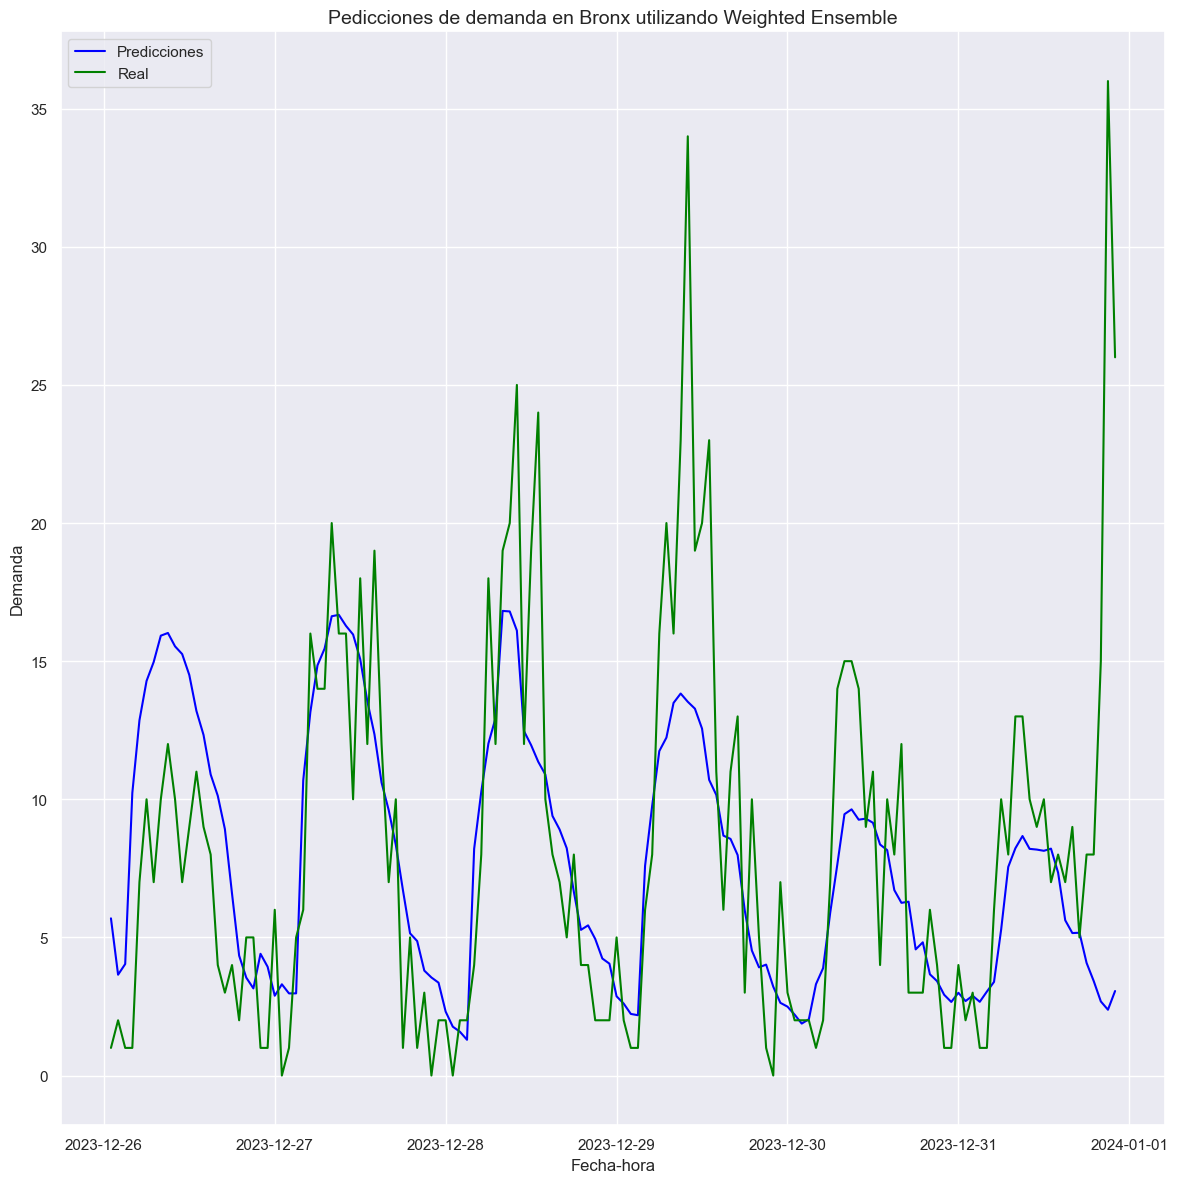

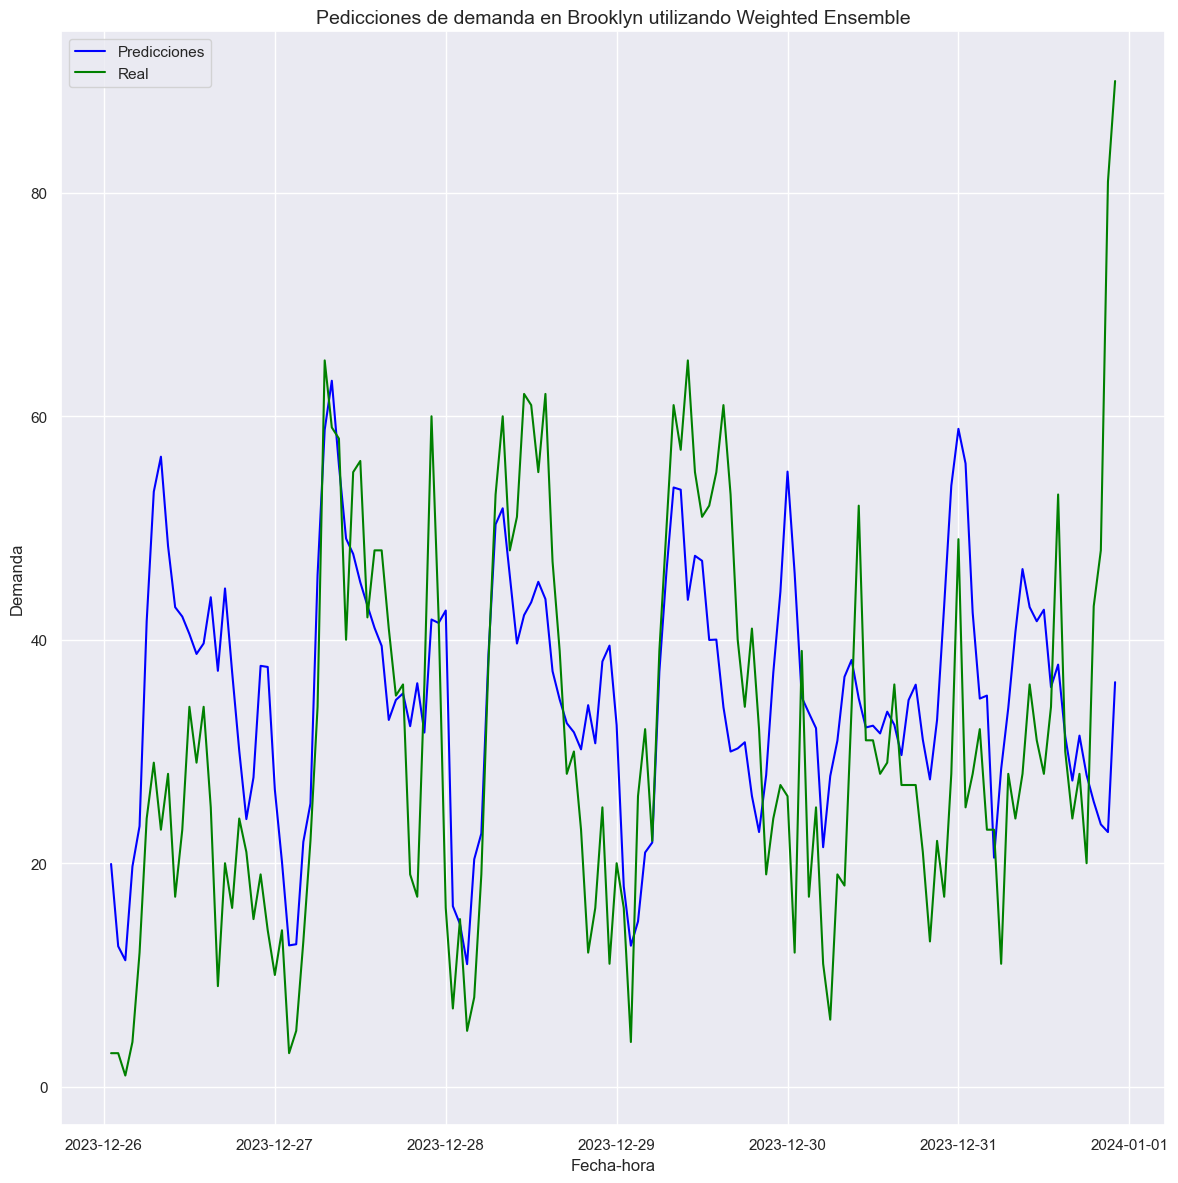

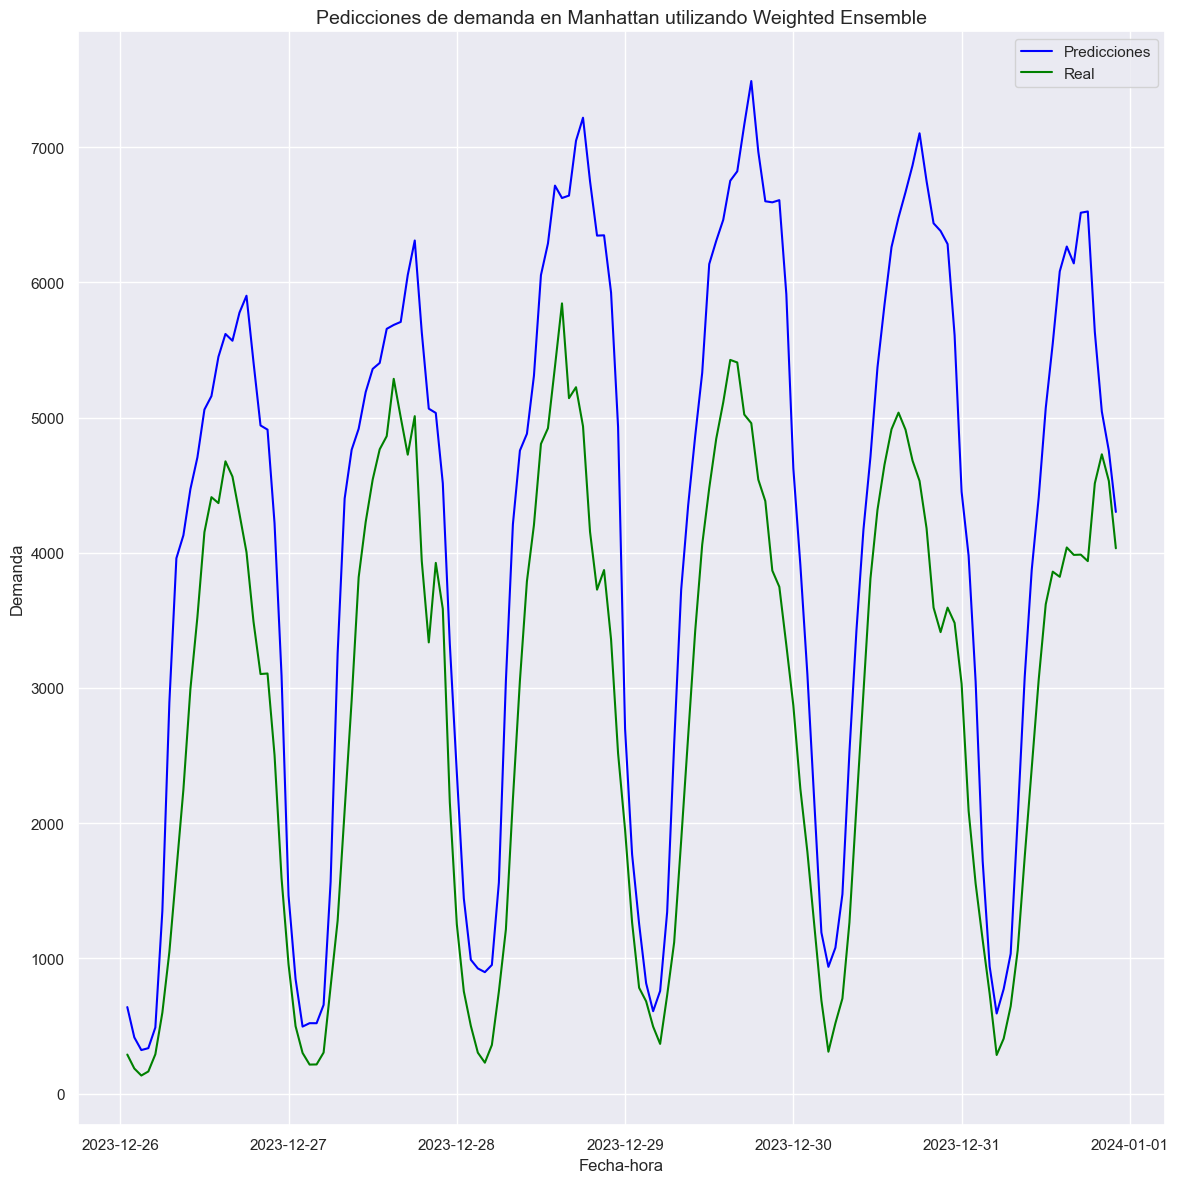

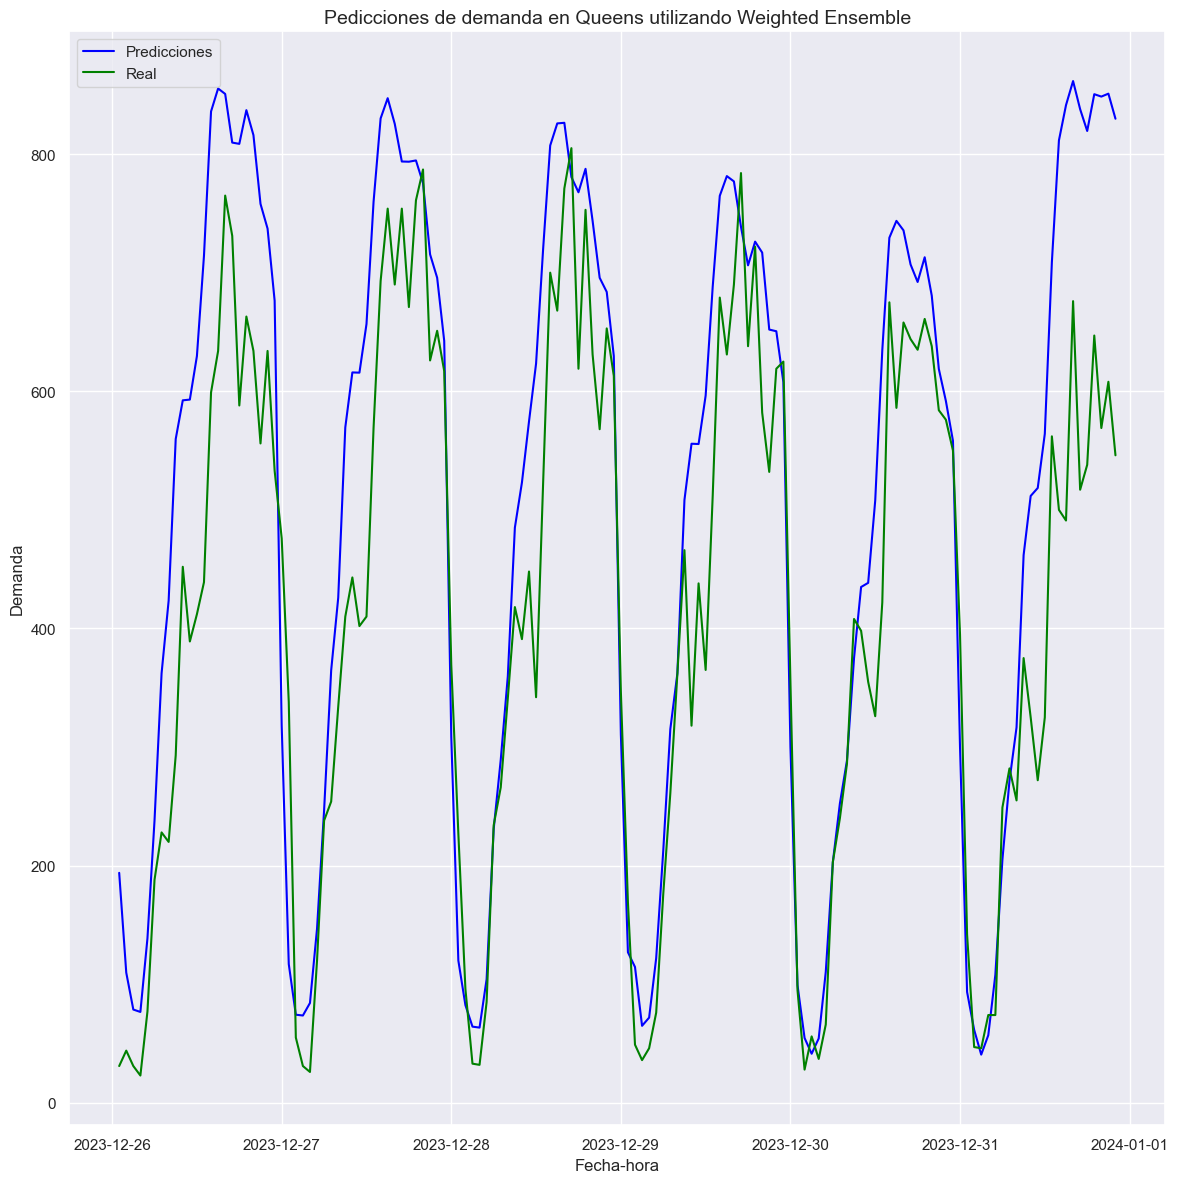

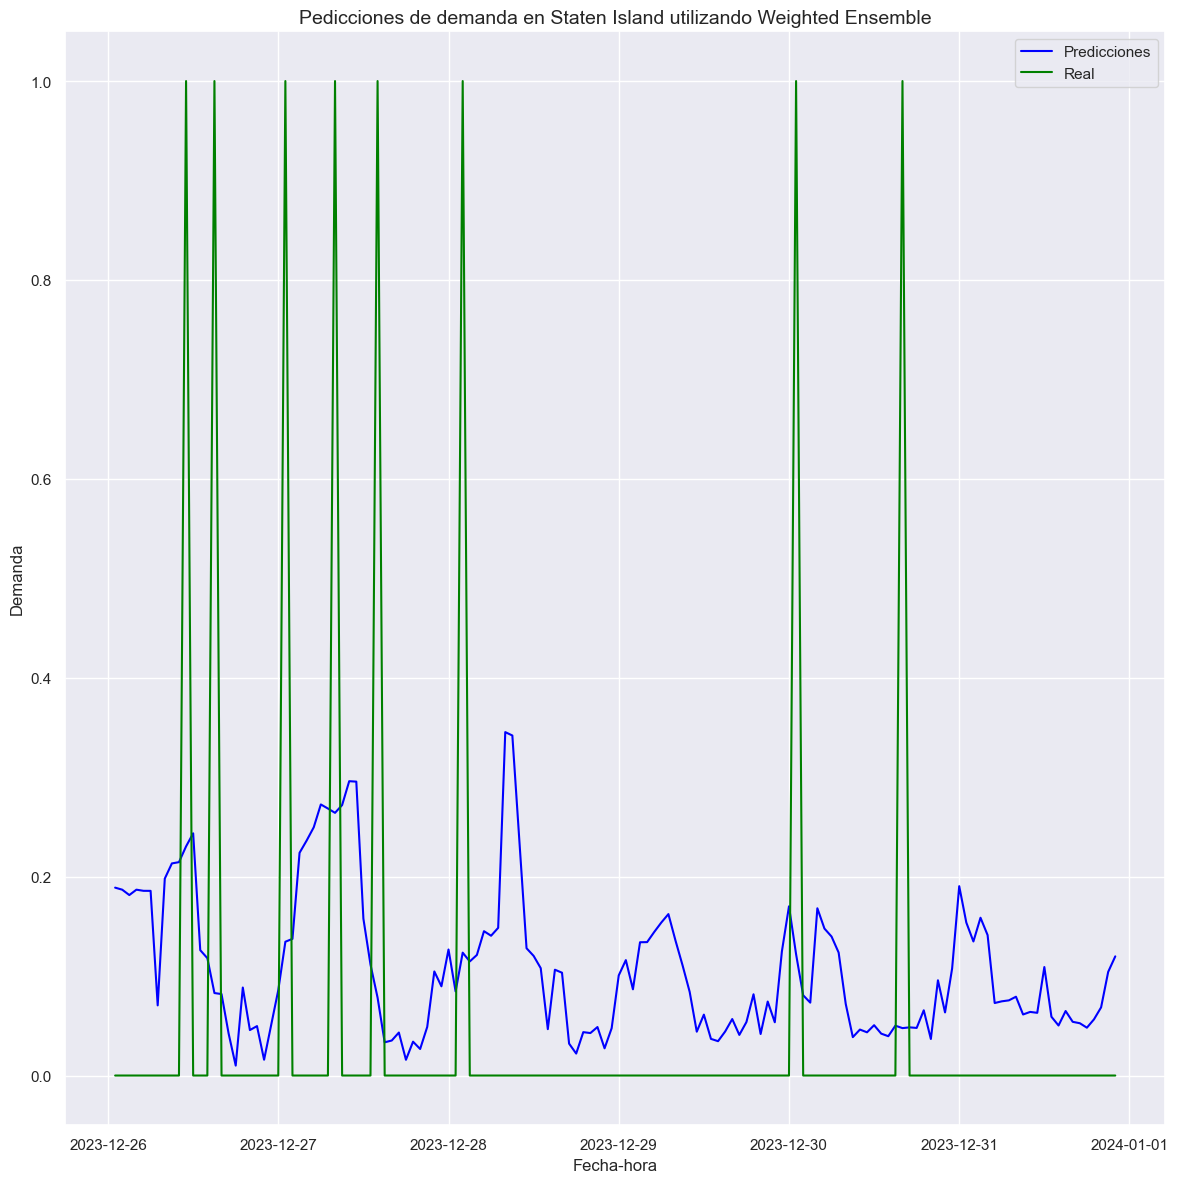

In [4]:
for district in ensemble_predictions.keys():
        plt.figure(figsize=(12,12))
        sns.set_style('darkgrid')
        sns.lineplot(ensemble_predictions[district]['Predicted'], label='Predicciones', color='blue')
        sns.lineplot(ensemble_predictions[district]['Real values'], label='Real', color='green')
        plt.title(f'Pedicciones de demanda en {district} utilizando Weighted Ensemble', fontsize=14)
        plt.xlabel('Fecha-hora', fontsize=12)
        plt.ylabel('Demanda', fontsize=12)
        plt.tight_layout()
        plt.show()